# Import and install

In [11]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

import requests

import os

# Functions

In [69]:
def sigla_to_province(sigla):
    sigla_map = {
        "AG": "Agrigento",
        "AL": "Alessandria",
        "AN": "Ancona",
        "AO": "Aosta",
        "AR": "Arezzo",
        "AP": "Ascoli Piceno",
        "AT": "Asti",
        "AV": "Avellino",
        "BA": "Bari",
        "BT": "Barletta-Andria-Trani",
        "BL": "Belluno",
        "BN": "Benevento",
        "BG": "Bergamo",
        "BI": "Biella",
        "BO": "Bologna",
        "BZ": "Bolzano",
        "BS": "Brescia",
        "BR": "Brindisi",
        "CA": "Cagliari",
        "CL": "Caltanissetta",
        "CB": "Campobasso",
        "CI": "Carbonia-Iglesias",
        "CE": "Caserta",
        "CT": "Catania",
        "CZ": "Catanzaro",
        "CH": "Chieti",
        "CO": "Como",
        "CS": "Cosenza",
        "CR": "Cremona",
        "KR": "Crotone",
        "CN": "Cuneo",
        "EN": "Enna",
        "FM": "Fermo",
        "FE": "Ferrara",
        "FI": "Firenze",
        "FG": "Foggia",
        "FC": "Forlì-Cesena",
        "FR": "Frosinone",
        "GE": "Genova",
        "GO": "Gorizia",
        "GR": "Grosseto",
        "IM": "Imperia",
        "IS": "Isernia",
        "AQ": "L'Aquila",
        "SP": "La Spezia",
        "LT": "Latina",
        "LE": "Lecce",
        "LC": "Lecco",
        "LI": "Livorno",
        "LO": "Lodi",
        "LU": "Lucca",
        "MC": "Macerata",
        "MN": "Mantova",
        "MS": "Massa-Carrara",
        "MT": "Matera",
        "VS": "Medio Campidano",
        "ME": "Messina",
        "MI": "Milano",
        "MO": "Modena",
        "MB": "Monza e Brianza",
        "NA": "Napoli",
        "NO": "Novara",
        "NU": "Nuoro",
        "OR": "Oristano",
        "PD": "Padova",
        "PA": "Palermo",
        "PR": "Parma",
        "PV": "Pavia",
        "PG": "Perugia",
        "PU": "Pesaro e Urbino",
        "PE": "Pescara",
        "PC": "Piacenza",
        "PI": "Pisa",
        "PT": "Pistoia",
        "PN": "Pordenone",
        "PZ": "Potenza",
        "PO": "Prato",
        "RG": "Ragusa",
        "RA": "Ravenna",
        "RC": "Reggio Calabria",
        "RE": "Reggio Emilia",
        "RI": "Rieti",
        "RN": "Rimini",
        "RM": "Roma",
        "RO": "Rovigo",
        "SA": "Salerno",
        "SS": "Sassari",
        "SV": "Savona",
        "SI": "Siena",
        "SR": "Siracusa",
        "SO": "Sondrio",
        "TA": "Taranto",
        "TE": "Teramo",
        "TR": "Terni",
        "TO": "Torino",
        "TP": "Trapani",
        "TN": "Trento",
        "TV": "Treviso",
        "TS": "Trieste",
        "UD": "Udine",
        "VA": "Varese",
        "VE": "Venezia",
        "VB": "Verbano-Cusio-Ossola",
        "VC": "Vercelli",
        "VR": "Verona",
        "VV": "Vibo Valentia",
        "VI": "Vicenza",
        "VT": "Viterbo"
    }
    return sigla_map.get(sigla.upper(), None)

def replace_comma(text):
    if isinstance(text, str):
        return text.replace(",", ".")
    return text

buffer = {}

def get_province_coordinates(province_name):

    if province_name in buffer:
        return buffer[province_name]
    
    url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": f"{province_name}, Italy",
        "format": "json",
        "addressdetails": 1,
        "limit": 1
    }
    headers = {
        "User-Agent": "YourAppNameHere"  # Nominatim requires a valid user agent
    }

    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data:
            lat = float(data[0]["lat"])
            lon = float(data[0]["lon"])
            buffer[province_name] = (lat, lon)
            return lat, lon
        else:
            print("No results found.")
            return None
    else:
        print(f"Error: {response.status_code}")
        return None

def get_latitude(province):
    lat, lon = get_province_coordinates(province)
    return lat

def get_longitude(province):
    lat, lon = get_province_coordinates(province)
    return lon

In [ ]:
df = pd.read_csv('data/original.csv')
df = df.dropna()

df['CLAIM_PROVINCE'] = df['CLAIM_PROVINCE'].apply(sigla_to_province)
df['CLAIM_LATITUDE'] = df['CLAIM_PROVINCE'].apply(get_latitude)
df['CLAIM_LONGITUDE'] = df['CLAIM_PROVINCE'].apply(get_longitude)

df.head()

,CLAIM_ID,POLICYHOLDER_AGE,POLICYHOLDER_GENDER,WARRANTY,CLAIM_DATE,CLAIM_REGION,CLAIM_PROVINCE,VEHICLE_BRAND,VEHICLE_MODEL,CLAIM_AMOUNT_PAID,PREMIUM_AMOUNT_PAID,CLAIM_LATITUDE,CLAIM_LONGITUDE
0,1,49,M,CIVIL LIABILITY INSURANCE,04/06/2022,TOSCANA,Grosseto,BMW,Serie 3 (E46),8000,"393,20",42.775110,11.287804
2,3,75,F,CIVIL LIABILITY INSURANCE,20/12/2023,CALABRIA,Reggio Calabria,FIAT,PANDA 2A SERIE,"1316,44","393,20",38.103539,15.639756
3,4,63,M,TRAVEL ASSISTANCE,16/01/2024,TOSCANA,Massa-Carrara,IVECO,DAILY (1992-1996),"309,15","32,21",44.213149,10.052561
4,5,65,F,CIVIL LIABILITY INSURANCE,10/08/2022,LAZIO,Viterbo,SMART,forfour 2as. (W453),"1057,7","393,20",42.492952,11.948814
5,6,56,M,CIVIL LIABILITY INSURANCE,17/11/2022,MARCHE,Pesaro e Urbino,YAMAHA,MAJESTY,476,"393,20",43.694113,12.701444


In [27]:
df.to_csv('data/processed.csv', index=False)

In [28]:
df.head()

,CLAIM_ID,POLICYHOLDER_AGE,POLICYHOLDER_GENDER,WARRANTY,CLAIM_DATE,CLAIM_REGION,CLAIM_PROVINCE,VEHICLE_BRAND,VEHICLE_MODEL,CLAIM_AMOUNT_PAID,PREMIUM_AMOUNT_PAID,CLAIM_LATITUDE,CLAIM_LONGITUDE
0,1,49,M,CIVIL LIABILITY INSURANCE,04/06/2022,TOSCANA,Grosseto,BMW,Serie 3 (E46),8000,"393,20",42.775110,11.287804
2,3,75,F,CIVIL LIABILITY INSURANCE,20/12/2023,CALABRIA,Reggio Calabria,FIAT,PANDA 2A SERIE,"1316,44","393,20",38.103539,15.639756
3,4,63,M,TRAVEL ASSISTANCE,16/01/2024,TOSCANA,Massa-Carrara,IVECO,DAILY (1992-1996),"309,15","32,21",44.213149,10.052561
4,5,65,F,CIVIL LIABILITY INSURANCE,10/08/2022,LAZIO,Viterbo,SMART,forfour 2as. (W453),"1057,7","393,20",42.492952,11.948814
5,6,56,M,CIVIL LIABILITY INSURANCE,17/11/2022,MARCHE,Pesaro e Urbino,YAMAHA,MAJESTY,476,"393,20",43.694113,12.701444


In [36]:
sampled_df = df.sample(1000, random_state=12)

In [37]:
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster
from shapely.geometry import Point
from IPython.display import IFrame

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(sampled_df, geometry=gpd.points_from_xy(sampled_df['CLAIM_LONGITUDE'], sampled_df['CLAIM_LATITUDE']))
gdf = gdf.set_index('CLAIM_ID')

# Initialize Folium map
m = folium.Map(location=[sampled_df['CLAIM_LATITUDE'].mean(), sampled_df['CLAIM_LONGITUDE'].mean()], zoom_start=6)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the cluster
for _, row in gdf.iterrows():
    folium.Marker(
        location=[row['CLAIM_LATITUDE'], row['CLAIM_LONGITUDE']],
        popup=row['CLAIM_PROVINCE'],
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

# Save the map
m.save('data/folium_map.html')

# Display the map in notebook
IFrame('data/folium_map.html', width=800, height=600)

# Show the map (in interactive environments)
m


<Axes: xlabel='CLAIM_REGION'>

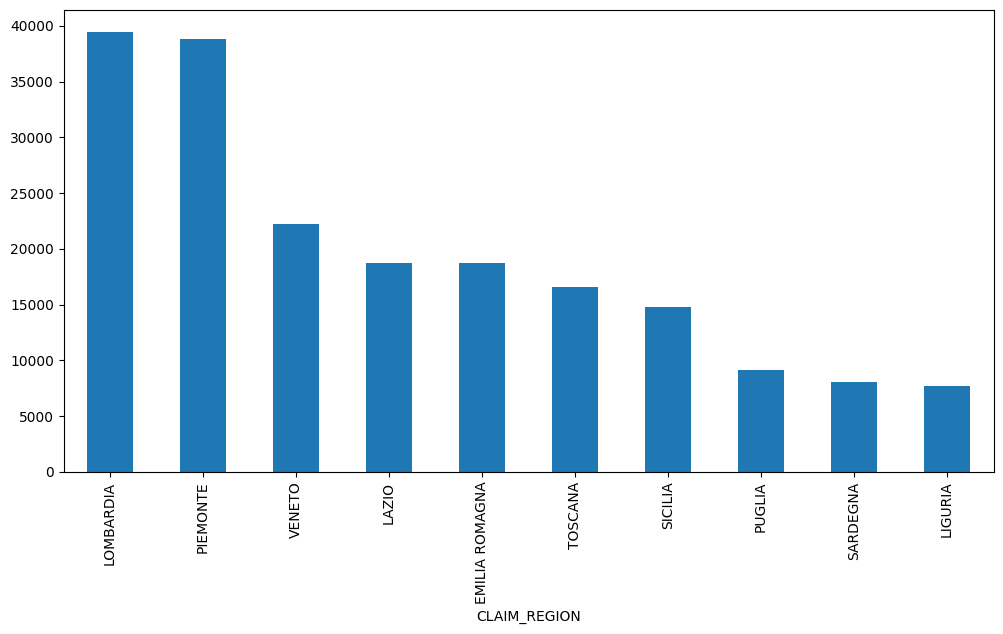

In [40]:
df.groupby('CLAIM_REGION')['CLAIM_ID'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6))

# TODO
1. Gruop by region and plot claim/premium


In [54]:
# ratio
df['CLAIM_AMOUNT_PAID'] = df['CLAIM_AMOUNT_PAID'].apply(replace_comma).astype(float)
df['PREMIUM_AMOUNT_PAID'] = df['PREMIUM_AMOUNT_PAID'].apply(replace_comma).astype(float)

df['RATIO'] = df['PREMIUM_AMOUNT_PAID']/ df['CLAIM_AMOUNT_PAID'] 

In [64]:
df = df[~df['WARRANTY'].isin(['CIVIL LIABILITY FOR NON-COMMERCIAL VEHICLES', 'KASCO AT FIRST ABSOLUTE RISK', 'DRIVER ACCIDENTS - HOSPITAL DAILY ALLOWANCE'])]

<Axes: xlabel='CLAIM_REGION'>

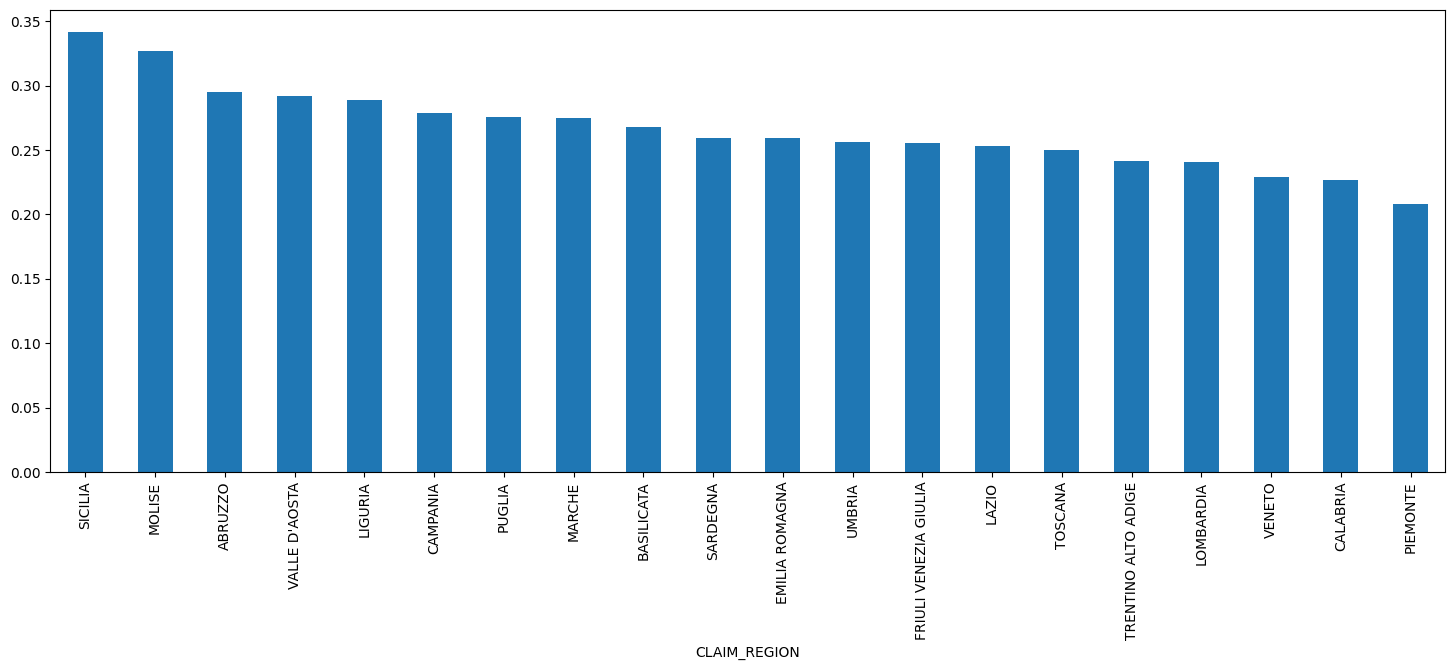

In [65]:
# Group by region and calculate the mean ratio
mean_ratio_by_region = df.groupby('CLAIM_REGION')['RATIO'].mean().sort_values(ascending=False)

# Plot the mean ratio by region
mean_ratio_by_region.plot(kind='bar', figsize=(18, 6))

In [ ]:
# normalize with respect to the number of claims

groped_by_warranty = df.groupby(by='WARRANTY')['CLAIM_ID'].count().sort_values(ascending=False)



In [70]:
df['NORMED_RATIO'] = None
max_value = groped_by_warranty.max

for i, row in df.iterrows():
    row.at(i, 'NORMED_RATIO') = row['RATIO'] / (max_value + 1 - groped_by_warranty[row['WARRANTY']])

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2817540182.py, line 5)

In [67]:
groped_by_warranty

WARRANTY
CIVIL LIABILITY INSURANCE                  135743
GLASSES                                     34886
TRAVEL ASSISTANCE                           26590
NATURAL DISASTERS                           12861
SOCIOPOLITICAL EVENTS                        5987
SPECIAL TRAVEL                               3421
GUARANTEE FAILURES                           2540
THEFT                                        2428
SAFE REIMBURSEMENT OPTION                    1054
GREEN LINE                                    946
ADDITIONAL COVERAGES                          497
POLE POSITION ASSISTANCE                      405
LEGAL PROTECTION                              211
OVER 65                                       169
WILD ANIMAL COLLISION                         141
VEHICLE FIRE                                   98
DRIVER ACCIDENTS - PERMANENT DISABILITY        85
ACCIDENTS                                      73
COLLISION WITH FOREIGN VEHICLES                65
DRIVER ACCIDENTS - MEDICAL EXPENSES      

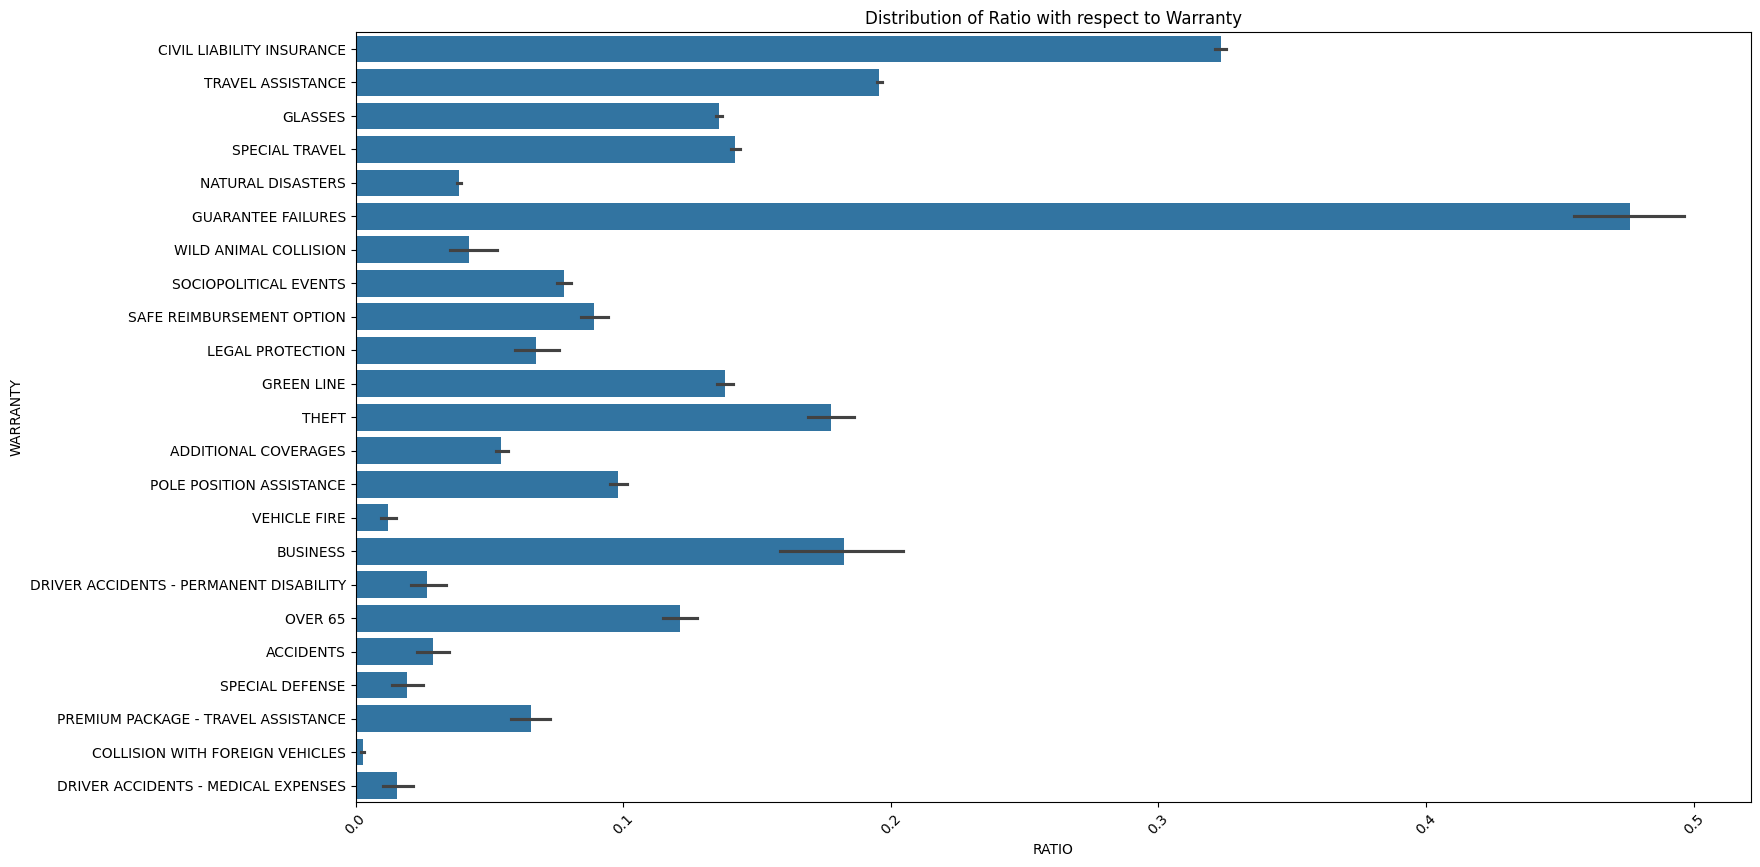

In [68]:
# Plot the distribution of the ratio with respect to WARRANTY
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.barplot(x='RATIO', y='WARRANTY', data=df)
plt.title('Distribution of Ratio with respect to Warranty')
plt.xticks(rotation=45)
plt.show()